Group Assignment 4 gussian mixture done by keval patel and smit 

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import seaborn as sns




In [4]:

Face = fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [5]:
Face.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [30]:
df = pd.DataFrame(Face.data)
sy = pd.Series(Face.target, dtype="category")
df['class'] = sy
df.tail()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,class
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,0.702479,0.657025,0.665289,0.731405,0.747934,0.768595,0.768595,0.768595,0.780992,0.809917,0.809917,0.814050,0.818182,0.814050,0.809917,0.818182,0.805785,0.809917,0.805785,0.822314,0.814050,0.818182,0.814050,0.805785,0.797521,0.793388,0.789256,0.780992,0.785124,0.772727,...,0.231405,0.280992,0.330579,0.330579,0.351240,0.351240,0.347107,0.347107,0.355372,0.376033,0.371901,0.359504,0.342975,0.363636,0.309917,0.301653,0.252066,0.276859,0.314050,0.334711,0.322314,0.330579,0.347107,0.338843,0.351240,0.371901,0.363636,0.351240,0.367769,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,0.652893,0.669421,0.698347,0.731405,0.760331,0.768595,0.797521,0.801653,0.801653,0.805785,0.809917,0.814050,0.818182,0.826446,0.826446,0.822314,0.826446,0.826446,0.826446,0.822314,0.826446,0.830579,0.826446,0.826446,0.822314,0.830579,0.826446,0.834711,0.834711,0.830579,...,0.776860,0.785124,0.797521,0.793388,0.797521,0.805785,0.814050,0.805785,0.809917,0.801653,0.805785,0.801653,0.801653,0.780992,0.752066,0.723140,0.710744,0.690083,0.648760,0.623967,0.599174,0.590909,0.590909,0.582645,0.566116,0.541322,0.520661,0.491736,0.446281,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,0.719008,0.735537,0.702479,0.698347,0.752066,0.768595,0.785124,0.793388,0.801653,0.805785,0.814050,0.822314,0.822314,0.822314,0.826446,0.814050,0.814050,0.801653,0.805785,0.805785,0.805785,0.805785,0.809917,0.809917,0.801653,0.805785,0.789256,0.789256,0.789256,0.785124,...,0.491736,0.537190,0.541322,0.557851,0.561983,0.570248,0.574380,0.557851,0.545455,0.533058,0.549587,0.541322,0.524793,0.512397,0.504132,0.466942,0.450413,0.404959,0.371901,0.342975,0.347107,0.363636,0.367769,0.367769,0.376033,0.417355,0.111570,0.198347,0.239669,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,0.595041,0.615702,0.648760,0.690083,0.719008,0.752066,0.768595,0.785124,0.785124,0.789256,0.797521,0.793388,0.793388,0.814050,0.814050,0.818182,0.822314,0.818182,0.818182,0.814050,0.818182,0.805785,0.818182,0.809917,0.818182,0.818182,0.826446,0.830579,0.838843,0.822314,...,0.723140,0.735537,0.756198,0.764463,0.760331,0.772727,0.793388,0.789256,0.814050,0.805785,0.797521,0.789256,0.793388,0.789256,0.768595,0.756198,0.752066,0.731405,0.698347,0.690083,0.657025,0.652893,0.669421,0.648760,0.611570,0.595041,0.574380,0.549587,0.504132,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39
399,0.516529,0.462810,0.280992,0.252066,0.247934,0.367769,0.574380,0.615702,0.661157,0.615702,0.681818,0.702479,0.735537,0.739669,0.743802,0.768595,0.789256,0.793388,0.797521,0.814050,0.822314,0.822314,0.826446,0.830579,0.830579,0.834711,0.838843,0.834711,0.834711,0.834711,0.826446,0.830579,0.830579,0.830579,0.834711,0.834711,0.830579,0.830579,0.830579,0.822314,...,0.719008,0.723140,0.727273,0.735537,0.731405,0.727273,0.743802,0.747934,0.747934,0.743802,0.743802,0.735537,0.727273,0.710744,0.685950,0.636364,0.595041,0.578512,0.549587,0.512397,0.487603,0.454545,0.458678,0.454545,0.429752,0.417355,0.376033,0.351240,0.338843,0.276859,0.264463,0.293388,0.301653,0.293388,0.322314,0.322314,0.359504,0.355372,0.384298,39


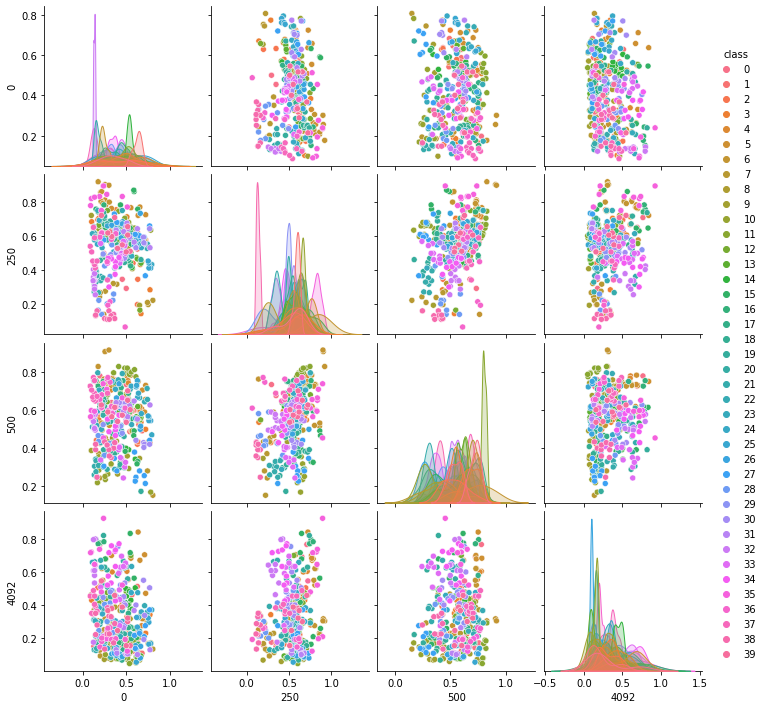

In [8]:
sns.pairplot(vars=[0, 250, 500, 4092], 
             hue="class", data=df)
plt.show()

In [9]:
df_keval = df.iloc[:, 0:4]
df_keval

,0,1,2,3
0,0.309917,0.367769,0.417355,0.442149
1,0.454545,0.471074,0.512397,0.557851
2,0.318182,0.400826,0.491736,0.528926
3,0.198347,0.194215,0.194215,0.194215
4,0.500000,0.545455,0.582645,0.623967
...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231
396,0.367769,0.367769,0.351240,0.301653
397,0.500000,0.533058,0.607438,0.628099
398,0.214876,0.219008,0.219008,0.223140


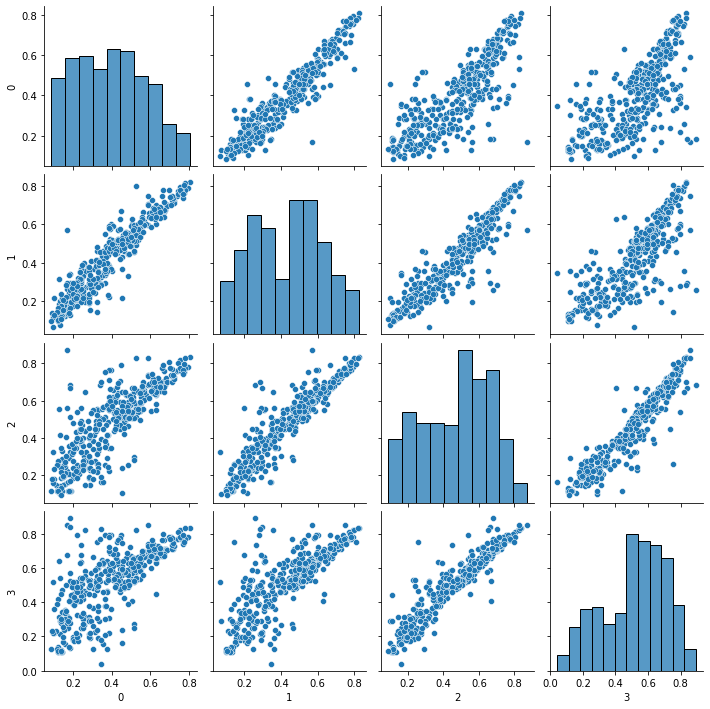

In [10]:
sns.pairplot(df_keval)
plt.show()

In [11]:
images=Face.images
target=Face.target

In [12]:
A=Face.data
print("A shape:",A.shape)

A shape: (400, 4096)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

# Use PCA preserving 99% of the variance to reduce the dataset’s dimensionality.

In [37]:

from sklearn.decomposition import PCA

pca=PCA(n_components=0.99)

A_pca = pca.fit_transform(A)
A_pca.shape



(400, 260)

In [38]:
pca.mean_

array([0.40013435, 0.43423545, 0.4762809 , ..., 0.32141536, 0.3136469 ,
       0.31045464], dtype=float32)

#  Determine the most suitable covariance_type for the dataset. 

In [36]:
from sklearn.mixture import GaussianMixture

In [20]:
gussian_mix = GaussianMixture(n_components=113, random_state=42, covariance_type="spherical").fit(A_pca)
gussian_mix.means_

array([[-2.85275499e+00, -4.53810636e+00, -2.46046690e+00, ...,
        -2.40758229e-02, -5.68989990e-03, -9.20578442e-03],
       [ 1.71493888e+00,  1.24844845e+00,  6.73927028e-01, ...,
         1.65877916e-02,  5.27693331e-02, -1.61472603e-02],
       [-4.44081077e+00,  3.02955724e-01,  3.16477339e-01, ...,
        -1.46329641e-02, -2.95076762e-02,  1.71780179e-02],
       ...,
       [-9.06394577e-01,  4.07856591e-01,  2.83118904e-01, ...,
         6.20615358e-03, -7.70316900e-02, -1.20285427e-02],
       [ 2.37622237e+00, -1.08104734e+01,  2.37346217e-01, ...,
         4.34556901e-02, -9.43774506e-02,  7.56090730e-02],
       [-9.38503325e-01, -3.05264068e+00, -2.99493170e+00, ...,
         3.65881361e-02, -5.94019033e-02,  5.28457910e-02]])

In [22]:
from sklearn.metrics import silhouette_score
clust=gussian_mix.predict(A_pca)
clust
print("Silhouette Score:" ,silhouette_score(A_pca, clust) )


Silhouette Score: 0.21527687


In [23]:
gussian_mix.covariances_

array([5.27160204e-02, 3.76633262e-02, 6.72426572e-02, 7.80744744e-02,
       4.39750578e-02, 3.04394605e-02, 3.05025690e-02, 6.93102080e-02,
       7.09095629e-02, 1.87999991e-02, 7.83513852e-02, 9.16321263e-02,
       8.86522862e-02, 1.00578040e-06, 3.81241668e-02, 5.23020577e-02,
       4.37771882e-02, 2.91343061e-02, 6.27177127e-02, 2.53288180e-02,
       2.33186100e-02, 6.07017909e-02, 5.51567522e-02, 6.09012871e-02,
       1.76038301e-02, 6.34499895e-02, 5.56024808e-02, 5.51851307e-02,
       5.67641267e-02, 6.71550216e-02, 8.31182187e-02, 5.02941248e-02,
       5.11651444e-02, 1.13344502e-01, 5.88720527e-02, 8.82252645e-02,
       3.06212555e-02, 4.71748416e-02, 4.50968927e-02, 8.24629862e-02,
       7.85739381e-02, 7.45550637e-02, 8.32317121e-02, 5.92250126e-02,
       1.01841622e-01, 4.78964101e-02, 3.03899593e-02, 3.67613896e-02,
       9.06716064e-02, 4.04628854e-02, 6.77747851e-02, 8.69255582e-02,
       4.09913464e-02, 3.30218402e-02, 1.00995604e-06, 5.77190598e-02,
      

# Determine the minimum number of clusters that best represent the dataset using either AIC or BIC. 




In [35]:


minimum_aic = np.infty

for i in range(1, 11):
    for covariance_type in ("tied", "full", "spherical", "diag"):
        aic = GaussianMixture(n_components=i, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(A_pca).aic(A_pca)
        if aic < minimum_aic:
            minimum_aic = aic
            best_i = i
            best_covariance_type = covariance_type

In [39]:
best_i

5

In [40]:
best_covariance_type

'full'

It appears that around 2 components minimizes the BIC; we will use this model. Let's quickly fit this to the data and confirm that it has converged:

In [43]:

gussian_mix = GaussianMixture(12, covariance_type='full', random_state=0)
gussian_mix.fit(A_pca)
print(gussian_mix.converged_)



True


#  Plot the results from (2) and (3)

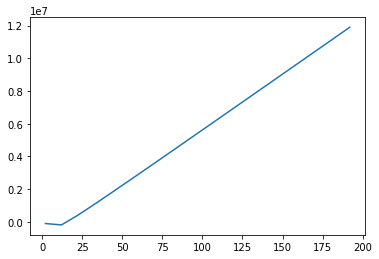

In [45]:
n_components = np.arange(2,200, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]

aics = [model.fit(A_pca).aic(A_pca) for model in models]
plt.plot(n_components, aics);

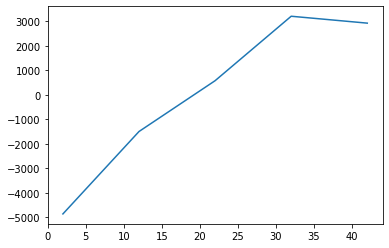

In [46]:

n_components = np.arange(2,50, 10)
models = [GaussianMixture(n, covariance_type='diag', random_state=0)
          for n in n_components]
aics = [model.fit(A_pca).aic(A_pca) for model in models]
plt.plot(n_components, aics);

In [58]:

gms_k = [GaussianMixture( covariance_type='full',n_components=k, n_init=5, random_state=35).fit(A_pca)
             for k in range(1, 35)]

In [59]:
bics = [model.bic(A_pca) for model in gms_k]
aics = [model.aic(A_pca) for model in gms_k]

In [60]:
bics

[202160.17574003548,
 169338.53334589978,
 62366.085721033276,
 102540.27120534773,
 218699.98467601684,
 364683.31253847445,
 523943.3805230815,
 685705.1506567511,
 861222.3594566087,
 1045264.1519479055,
 1235187.359321185,
 1419170.8614378762,
 1616091.0448905604,
 1798677.5137534416,
 2001732.0251357807,
 2200988.5983898873,
 2400072.069303133,
 2591284.1830953835,
 2791510.328877066,
 2994220.2302976996,
 3190359.4975088863,
 3389745.659010876,
 3588228.184019222,
 3786164.292730226,
 3990933.747585065,
 4183246.7351817144,
 4394262.648477992,
 4592751.042576111,
 4796459.43855599,
 4997894.394842761,
 5199068.274304578,
 5402396.826731173,
 5602450.430844106,
 5805527.295280615]

In [61]:
aics

[65692.0028744136,
 -103601.80384989112,
 -347046.41580492666,
 -443344.3946507812,
 -463656.84551028104,
 -454145.6819779925,
 -431357.7783235543,
 -406068.1725200538,
 -367023.12805036537,
 -319453.49988923734,
 -266002.4568461267,
 -218491.11905960448,
 -158043.0999370895,
 -111928.7954043774,
 -45346.44835220743,
 17437.96057173051,
 80049.26715480722,
 134789.21661688853,
 198543.19806840178,
 264780.93515886646,
 324448.03803988453,
 387362.0352117047,
 449372.39588988177,
 510836.3402707174,
 579133.6307953871,
 634974.4540618677,
 709518.2030279762,
 771534.432795926,
 838770.664445637,
 903733.4564022375,
 968435.1715338868,
 1035291.5596303116,
 1098872.9994130763,
 1165477.6995194163]

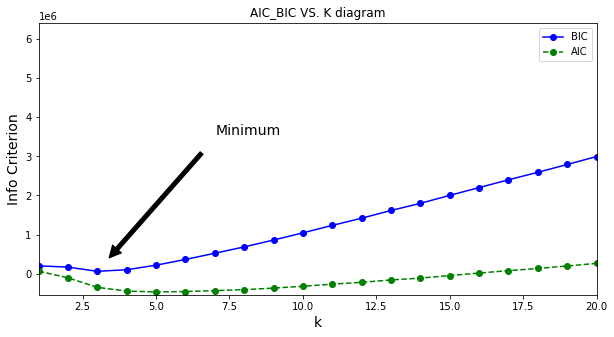

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 35), bics, "bo-", label="BIC")
plt.plot(range(1, 35), aics, "go--", label="AIC")
plt.xlabel("k", fontsize=14)
plt.ylabel("Info Criterion", fontsize=14)
plt.axis([1, 20, np.min(bics)-600000 , np.max(bics)+600000])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.title("AIC_BIC VS. K diagram")
plt.show()

# 5. Output the hard clustering for each instance.

predict() method for hard clustering 

In hard clustring every point belongs to particular cluster and only that one

In [64]:

gm_mix = GaussianMixture(5, covariance_type='full', random_state=0)
gm_mix.fit(A_pca)
gm_mix.predict(A_pca)

array([0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 4, 0, 1, 0, 0, 1, 1, 1, 3, 0, 1, 3, 0, 0, 0, 3, 3, 1, 3, 3, 1,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 3, 1, 0, 3, 3, 3, 4, 0, 0, 0, 0, 0,
       1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3, 3, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1,
       1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 0, 3, 3, 0, 0, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 3, 3, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3,
       1, 3, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 4, 4, 4, 4, 0, 0,
       4, 0, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 0, 3, 4,

# Output the soft clustering for each instance.


In [65]:
gm_mix.predict_proba(A_pca)

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

# Use the model to generate some new faces (using the sample() method), and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used)



In [66]:
A_new, b_new=gm_mix.sample(6)
A_new

array([[-8.98068085e+00,  7.53139062e-01,  1.85880139e+00, ...,
        -8.89859388e-02,  2.75816434e-02, -4.59189676e-02],
       [ 3.70393945e+00,  4.55972779e+00,  9.84383116e-02, ...,
         2.08283203e-01, -8.92614162e-02, -7.32711332e-02],
       [-1.59042313e+00, -4.61787895e+00,  1.62625042e+00, ...,
        -6.58613459e-02, -5.09708203e-02, -8.47757984e-02],
       [-1.51928369e+00, -3.35016798e+00, -3.40288519e-01, ...,
        -1.15325688e-01, -7.18232045e-02,  7.35164117e-02],
       [-1.41983983e+00, -1.51136050e+00, -3.65685292e+00, ...,
        -5.96736081e-02, -5.68130751e-03,  1.10562383e-01],
       [ 1.02619387e+01, -8.98828763e-01, -1.79281668e+00, ...,
        -5.02019850e-02, -7.64301620e-02,  9.86080934e-02]])

In [67]:
b_new

array([0, 0, 1, 1, 3, 4])

In [68]:
Face_new = pca.inverse_transform(A_new)

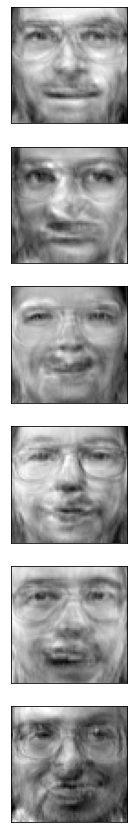

In [69]:
def plot_faces(data):
    fig, ax = plt.subplots(6, 1, figsize=(15, 15),
                           subplot_kw=dict(xticks=[], yticks=[]))
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(64, 64), cmap='gray')
      
plot_faces(Face_new)



# Modify some images (e.g., rotate, flip, darken).

Text(0.5, 1.0, 'face')

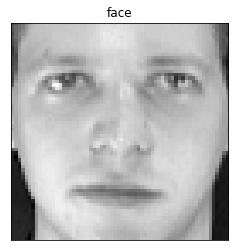

In [75]:
fig,ax=plt.subplots(1,1)
ax.imshow(images[0], cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('face')

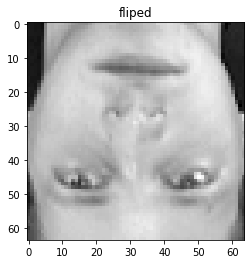

In [76]:
from scipy import ndimage

input_image =images[0]
input_flip = ndimage.rotate(input_image, 180,
                              mode = 'mirror')
plt.imshow(input_flip, cmap="gray")
plt.title('fliped')
plt.show()


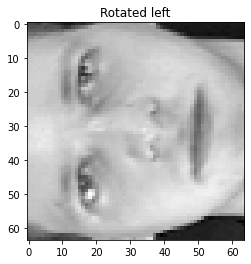

In [78]:
from scipy import ndimage

input_image =images[0]
input_rotate = ndimage.rotate(input_image, 90,
                              mode = 'mirror')
plt.imshow(input_rotate, cmap="gray")
plt.title('Rotated left')
plt.show()

Text(0.5, 1.0, 'high contrast')

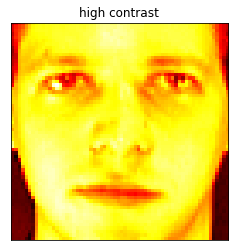

In [82]:
fig,ax=plt.subplots(1,1)
ax.imshow(images[0],  cmap="hot")
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('high contrast')

Text(0.5, 1.0, 'Darker')

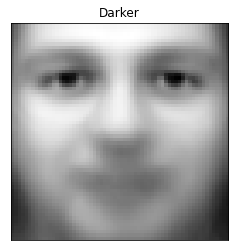

In [84]:
fig,ax=plt.subplots(1,1)
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Darker')

# Determine if the model can detect the anomalies produced in (8) by comparing the output of the score_samples() method for normal images and for anomalies). 

In [85]:
gm_mix2 = GaussianMixture(5, covariance_type='full', random_state=0)
gm_mix2.fit(images[0])
print(gm_mix2.converged_)

True


In [86]:
print(gm_mix2) 

GaussianMixture(n_components=5, random_state=0)


In [87]:
scores = gm_mix2.score_samples(images[0])
scores

array([309.77150657, 309.81484761, 309.76710357, 309.76702518,
       309.78620821, 309.79620697, 309.8670094 , 309.87138371,
       309.81884555, 309.77222397, 309.78068222, 309.76838869,
       309.75881837, 309.74896758, 309.73335942, 309.72747377,
       309.72571297, 309.7254774 , 309.72438613, 313.67315154,
       313.68537678, 313.73023837, 313.74799987, 313.76078481,
       313.76856743, 313.78552541, 313.76377904, 313.72963203,
       313.75945649, 313.76107919, 313.76432636, 313.74077307,
       313.78498538, 313.81210063, 313.72051811, 313.69778254,
       313.67711668, 313.67316936, 343.24110717, 343.24712212,
       343.26291752, 343.27103015, 343.27228492, 343.26679493,
       343.26738764, 343.25836432, 343.24576641, 343.24090357,
       363.69679501, 363.696949  , 363.69704402, 363.69685751,
       337.37960194, 337.39116266, 337.39909038, 337.39941797,
       337.40639237, 337.41070891, 337.4089527 , 337.40055486,
       337.39823492, 337.40132054, 337.39444124, 337.38

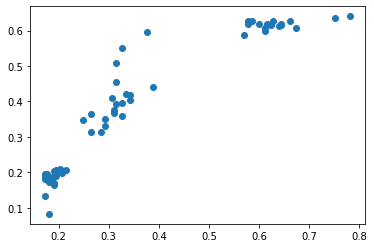

In [88]:
plt.scatter(images[0][:,0], images[0][:,1])
plt.show()

In [89]:
from numpy import quantile, where, random
thresh = quantile(scores, .03)
print(thresh) 

309.72568705509497


In [90]:
index = where(scores <= thresh)
values = images[0][index]


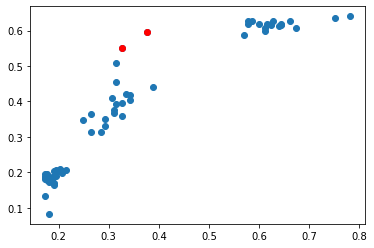

In [91]:
plt.scatter(images[0][:,0], images[0][:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

In [92]:
input_rotate.shape

(64, 64)

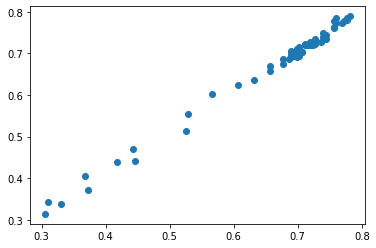

In [93]:
plt.scatter(input_rotate[:,0], input_rotate[:,1])
plt.show()

In [95]:
gm_mix3 = GaussianMixture(5, covariance_type='full', random_state=0)
gm_mix3.fit(input_rotate)
print(gm_mix3.converged_)

True


In [96]:
scores = gm_mix3.score_samples(input_rotate)
scores

array([352.63070278, 352.63087544, 352.63067165, 352.96726538,
       352.96738566, 320.57548926, 320.57620533, 302.62559416,
       302.67403804, 302.6532862 , 302.649983  , 302.65788702,
       302.66368564, 302.64519203, 302.63632937, 302.63863481,
       302.64470872, 302.6694428 , 302.62891693, 323.94145014,
       323.97298315, 323.97051677, 323.95186259, 323.94974998,
       323.93966305, 320.5835537 , 320.5852972 , 320.61218575,
       320.62350924, 320.60064679, 320.59302008, 320.59136388,
       320.59661034, 320.59124955, 320.60114587, 320.61020887,
       320.62209789, 320.62605053, 320.59104904, 323.9388359 ,
       323.94625324, 323.94870787, 323.95680018, 323.95820067,
       323.9682972 , 323.95892244, 323.96456135, 323.93896417,
       302.6278353 , 302.63740525, 302.63005921, 302.63917908,
       302.63925856, 302.64004601, 302.67133032, 302.66377113,
       302.62046532, 352.96712205, 352.96721839, 352.96728098,
       352.9672335 , 352.63062821, 352.63071316, 352.63

In [98]:
thresh1 = quantile(scores, .03)
print(thresh1) 

302.6275887776461


In [99]:

index1 = where(scores <= thresh1)
values1 = input_rotate[index1]

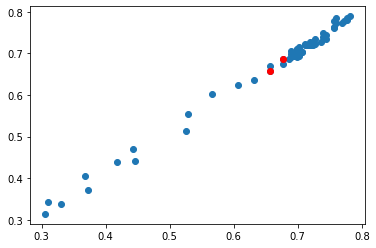

In [100]:

plt.scatter(input_rotate[:,0],input_rotate[:,1])
plt.scatter(values1[:,0], values1[:,1], color='r')
plt.show()

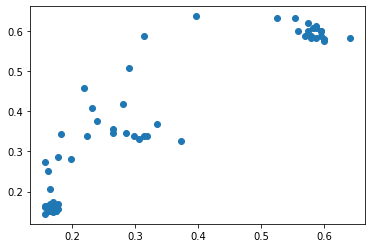

In [101]:
plt.scatter(input_flip[:,0], input_flip[:,1])
plt.show()


In [102]:
gm_mix4 = GaussianMixture(5, covariance_type='full', random_state=0)
gm_mix4.fit(input_flip)
print(gm_mix4.converged_)

True


In [103]:
scores_2 = gm_mix4.score_samples(input_flip)
scores_2

array([333.08884406, 333.1048826 , 333.11372166, 333.11010338,
       333.1124032 , 333.12204268, 333.12466508, 333.11904863,
       333.11036963, 333.11039748, 333.10296965, 333.0922493 ,
       333.08532142, 341.21223146, 341.21440519, 341.21691172,
       341.21941837, 341.22281584, 341.22780608, 341.23888983,
       341.23654202, 341.22724378, 341.21509764, 321.43289815,
       321.43933619, 321.43185535, 321.49861573, 321.50175233,
       321.51723634, 321.53388568, 321.60168966, 321.58172973,
       321.55188642, 321.5709508 , 321.56897944, 321.56749726,
       321.54316684, 321.56560884, 321.58687046, 321.57337223,
       321.56378698, 321.52416837, 321.50225122, 343.42150071,
       343.42190674, 343.42170135, 343.42162273, 343.42142514,
       343.42130275, 321.43087305, 321.43316455, 343.42263253,
       343.42268131, 321.43559499, 321.46055442, 321.49452587,
       321.52734928, 321.52058743, 321.47315071, 321.47386767,
       321.46099071, 321.45827778, 321.49502879, 321.46

In [106]:
scores_2.min()

321.430873048241

In [105]:
scores_2.max()

343.4226813095213

In [108]:
thresh_2 = quantile(scores_2, .03)
print(thresh_2) 

321.4327834435416


In [110]:

index2 = where(scores_2 <= thresh_2)
values2 = input_rotate[index2]

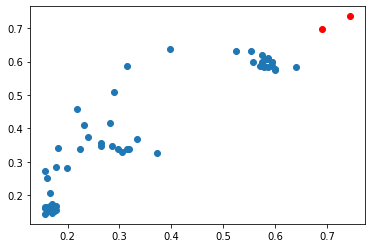

In [111]:

plt.scatter(input_flip[:,0],input_flip[:,1])
plt.scatter(values2[:,0], values2[:,1], color='r')
plt.show()